In [1]:
#Step 1
#Compute Required Fixed Values
#Average Chord
#Wing Area = Average Chord x Wing Span
#Coefficient of Lift (from wind tunnel simulation paper, angle of attack = 0):
#CL = 0.309
#Maryam

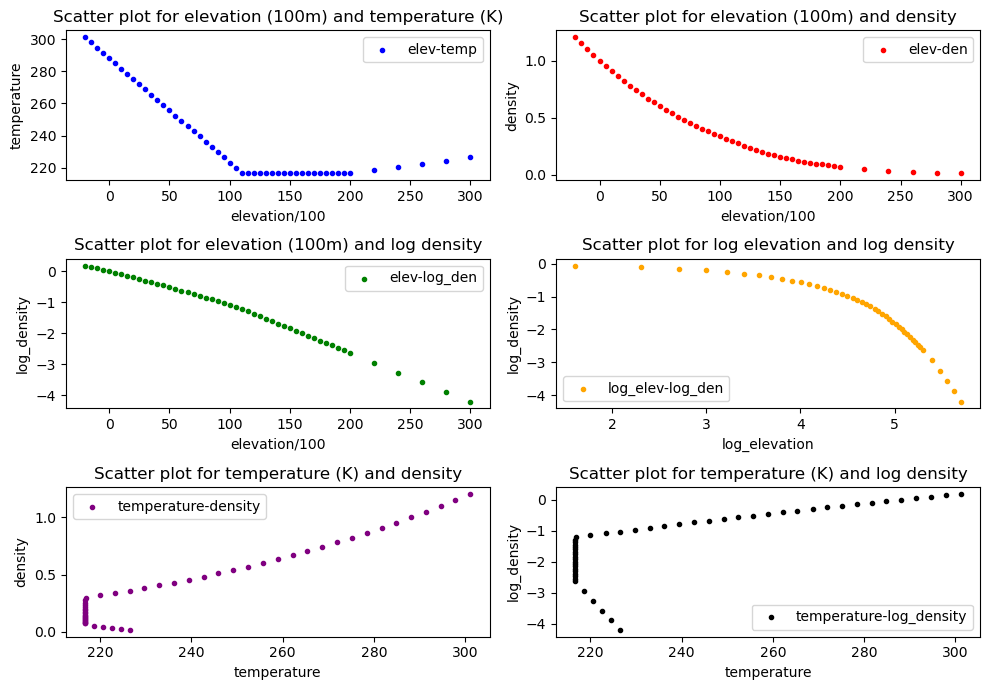

In [ ]:
#Step 2
#Develop Function and Model for Relationship between Air Density in relation to Temperature and Elevation
#Import table of data, develop relationship for variables, create model to represent relationship
#have function accept inputs of elevation, and compute air densities and changes in temperature
#Hongjie

#Initial Exploration of the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

##################import the data##############
#df = pd.read_excel("temperature elevation density data clean.xlsx",usecols=["Column1", "Column2","Column4"], engine="openpyxl")
#df = pd.read_excel("temperature elevation density data clean.xlsx", engine="openpyxl")

#print(df.columns)  
url ="https://hongjiexu.github.io/537_lift_force_project/temperature_elevation_density_data.csv"
df = pd.read_csv(url)

#print(df.head())

#data_array = df.to_numpy()

# Check it
#print(data_array)
#print(type(data_array))

column_names = df.columns.tolist()

#change the data structure################

elevationArray=df[column_names[0]].to_numpy() #'Elevation'
temperatureArray=df[column_names[1]].to_numpy() #'Temperature'
densityArray=df[column_names[3]].to_numpy()

log_temperature=np.log(temperatureArray)
log_elevation=np.log(elevationArray[5:])
log_density=np.log(densityArray)

#elevation in 100m
elevation_in100m=elevationArray/100
log_elevation_in100m=np.log(elevation_in100m[5:])

#######visualize the data/scatter plot#########

fig, ax = plt.subplots(3, 2, figsize=(10, 7))

ax[0,0].scatter(elevation_in100m, temperatureArray, color='blue', marker='.',label='elev-temp')

ax[0,0].set_xlabel('elevation/100')
ax[0,0].set_ylabel('temperature')
ax[0,0].legend()
ax[0, 0].set_title("Scatter plot for elevation (100m) and temperature (K)")

ax[0,1].scatter(elevation_in100m, densityArray, color='red', marker='.',label='elev-den')
ax[0,1].set_xlabel('elevation/100')
ax[0,1].set_ylabel('density')
ax[0,1].legend()
ax[0, 1].set_title("Scatter plot for elevation (100m) and density")


ax[1,0].scatter(elevation_in100m, log_density, color='green', marker='.',label='elev-log_den')
ax[1,0].set_xlabel('elevation/100')
ax[1,0].set_ylabel('log_density')
ax[1,0].legend()
ax[1, 0].set_title("Scatter plot for elevation (100m) and log density")

#ax[1, 1].axis('off') 

ax[1, 1].scatter(log_elevation_in100m, log_density[5:], color='orange', marker='.',label='log_elev-log_den')
ax[1,1].set_xlabel('log_elevation')
ax[1,1].set_ylabel('log_density')
ax[1,1].legend()
ax[1, 1].set_title("Scatter plot for log elevation and log density")

ax[2, 0].scatter(temperatureArray,  densityArray, color='purple', marker='.',label='temperature-density')
ax[2,0].set_xlabel('temperature')
ax[2,0].set_ylabel('density')
ax[2,0].legend()
ax[2, 0].set_title("Scatter plot for temperature (K) and density")

ax[2, 1].scatter(temperatureArray,  log_density, color='black', marker='.',label='temperature-log_density')
ax[2,1].set_xlabel('temperature')
ax[2,1].set_ylabel('log_density')
ax[2,1].legend()
ax[2, 1].set_title("Scatter plot for temperature (K) and log density")


plt.tight_layout()
#plt.savefig("Initial visualization.pdf", format="pdf", dpi=600, bbox_inches='tight')

plt.show()


In [ ]:
#Step 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm

url ="https://hongjiexu.github.io/537_lift_force_project/temperature_elevation_density_data.csv"
df = pd.read_csv(url)

column_names = df.columns.tolist()

elevationArray = df[column_names[0]].to_numpy()  #'Elevation'
temperatureArray = df[column_names[1]].to_numpy()  #'Temperature'
densityArray = df[column_names[3]].to_numpy()

log_density = np.log(densityArray)

#elevation in 100m
elevation_in100m = elevationArray / 100

### regression for elevation--log_density

#add a constant row
X_const1 = sm.add_constant(elevation_in100m[27:45])   # [:27]  [45:] just change to the corresponding pieces

#print(X_const)

#set up Y
Y1 = log_density[27:45]

#fit the model
model1 = sm.OLS(Y1, X_const1).fit()

# Print summary (p-values, R-squared, coefficients, etc.)
print(model1.summary())

#### regression for elevation--temperature

X_const2 = sm.add_constant(elevation_in100m[:27])   #[45:] [27:45]

Y2 = temperatureArray[:27]

model2 = sm.OLS(Y2, X_const2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.895e+07
Date:                Sun, 20 Apr 2025   Prob (F-statistic):           1.65e-54
Time:                        14:31:36   Log-Likelihood:                 128.13
No. Observations:                  18   AIC:                            -252.3
Df Residuals:                      16   BIC:                            -250.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5148      0.000   1706.879      0.0

/opt/anaconda3/envs/MATH537/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


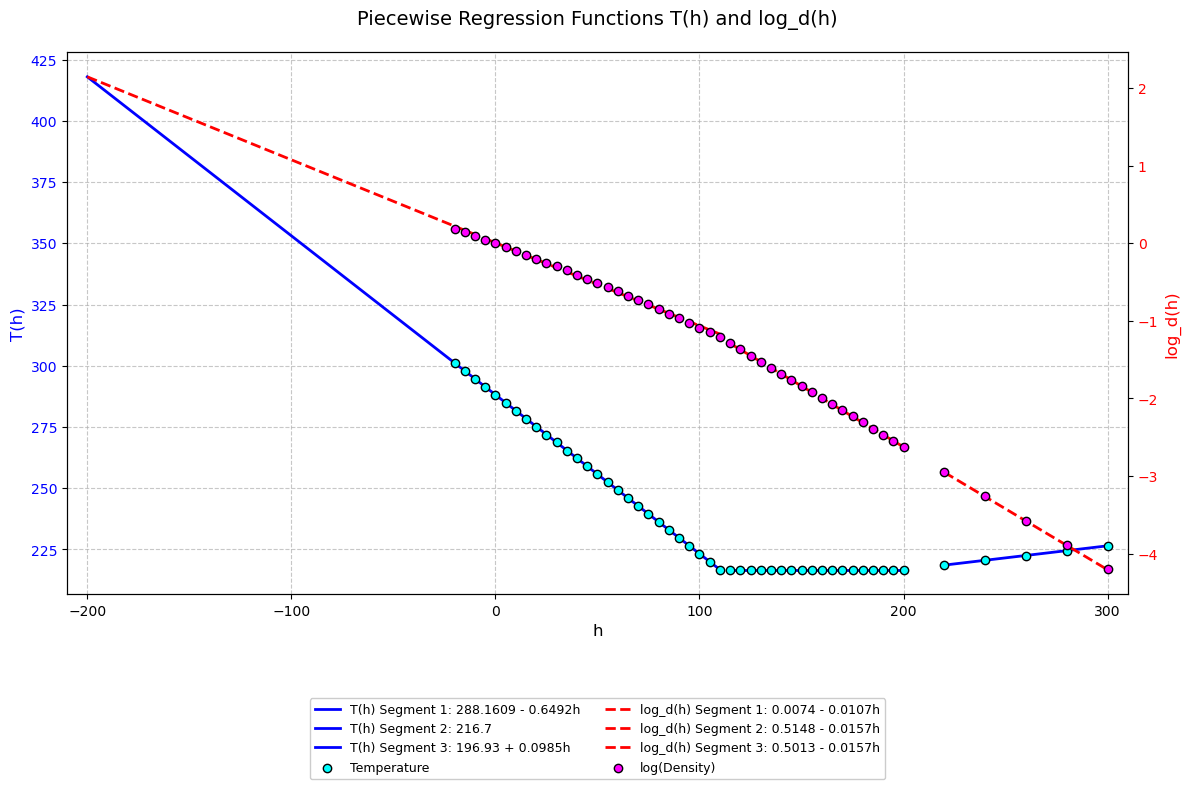

In [ ]:
#Step 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#df = pd.read_excel("temperature elevation density data clean.xlsx",usecols=["Column1", "Column2","Column4"], engine="openpyxl")
url ="https://hongjiexu.github.io/537_lift_force_project/temperature_elevation_density_data.csv"
df = pd.read_csv(url)

#print(df.columns)  

column_names = df.columns.tolist()

#print(column_names)
#elevation=df.columns[0]
elevation=df[column_names[0]]
#print('The elevation data: ')
#print(elevation)

temperature=df[column_names[1]]

#print('The temperature data: ')
#print(temperature)

density=df[column_names[3]]

#print('The density data: ')
#print(density)

#change the data structure################

elevationArray=df[column_names[0]].to_numpy() #'Elevation'
temperatureArray=df[column_names[1]].to_numpy() #'Temperature'
densityArray=df[column_names[3]].to_numpy()

log_density=np.log(densityArray)
elevation_in100m=elevationArray/100

# Define the first piecewise function T(h)
def piecewise_T(h):
    if -200 <= h <= 110:
        return 288.1609 - 0.6492 * h
    elif 115 <= h <= 200:
        return 216.7
    elif 220 <= h <= 300:
        return 196.93 + 0.0985 * h
    else:
        return np.nan

# Define the second piecewise function log_d(h)
def piecewise_log_d(h):
    if -200 <= h <= 110:
        return 0.0074 - 0.0107 * h
    elif 115 <= h <= 200:
        return 0.5148 - 0.0157 * h
    elif 220 <= h <= 300:
        return 0.5013 - 0.0157 * h
    else:
        return np.nan

# Vectorize the functions for array inputs
piecewise_T_vec = np.vectorize(piecewise_T)
piecewise_log_d_vec = np.vectorize(piecewise_log_d)

# Create x values for each segment
h1 = np.linspace(-200, 110, 200)
h2 = np.linspace(115, 200, 100)
h3 = np.linspace(220, 300, 200)

# Calculate y values for each function
T1, T2, T3 = piecewise_T_vec(h1), piecewise_T_vec(h2), piecewise_T_vec(h3)
logd1, logd2, logd3 = piecewise_log_d_vec(h1), piecewise_log_d_vec(h2), piecewise_log_d_vec(h3)

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))  # Slightly taller figure for better legend spacing

# Plot T(h) on the primary y-axis
ax1.plot(h1, T1, 'b-', linewidth=2, label='T(h) Segment 1: 288.1609 - 0.6492h')
ax1.plot(h2, T2, 'b-', linewidth=2, label='T(h) Segment 2: 216.7')
ax1.plot(h3, T3, 'b-', linewidth=2, label='T(h) Segment 3: 196.93 + 0.0985h')
ax1.set_xlabel('h', fontsize=12)
ax1.set_ylabel('T(h)', color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for log_d(h)
ax2 = ax1.twinx()
ax2.plot(h1, logd1, 'r--', linewidth=2, label='log_d(h) Segment 1: 0.0074 - 0.0107h')
ax2.plot(h2, logd2, 'r--', linewidth=2, label='log_d(h) Segment 2: 0.5148 - 0.0157h')
ax2.plot(h3, logd3, 'r--', linewidth=2, label='log_d(h) Segment 3: 0.5013 - 0.0157h')
ax2.set_ylabel('log_d(h)', color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')

# Plot actual data points
ax1.scatter(elevation_in100m, temperatureArray, color='cyan', edgecolors='black', label='Temperature', zorder=5)
ax2.scatter(elevation_in100m, log_density, color='magenta', edgecolors='black', label='log(Density)', zorder=5)

# Add title and grid
plt.title('Piecewise Regression Functions T(h) and log_d(h)', fontsize=14, pad=20)
ax1.grid(True, linestyle='--', alpha=0.7)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

#ax1.legend(lines1 + lines2, labels1 + labels2, 
 #          loc='upper center', 
 #          bbox_to_anchor=(0.5, -0.18), 
  #         ncol=2, 
 #          fontsize=9,
 #          framealpha=1)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
all_lines = lines1 + lines2
all_labels = labels1 + labels2
ax1.legend(all_lines, all_labels, 
           loc='upper center', 
           bbox_to_anchor=(0.5, -0.18), 
           ncol=2, 
           fontsize=9,
           framealpha=1)


# Set x limits to show all segments clearly
ax1.set_xlim(-210, 310)

# Adjust layout and save as PDF
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # Extra space for legend
plt.savefig('regression_plot.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

In [6]:
#Step 3
#Create model representing equation of Lift depending on fixed values and air density model
#have it accept inputs of elevation, air densities from function modeling air density WRT elevation, for a changing velocity
#Force of Lift = (0.5) * Airdensity * WingArea * CoefficientofLift * (VelocityofAircraft)**2
#Luis
import numpy as np
from numpy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

#Gross Dimensions
w_area = 124.6
#Approx Dimensions (Wingspan*Mean Aerodynamic Chord)
approx_w_area = 135.8866
#max takeoff weight 60327.79 kg
mass = 60327.79
g=9.81
#angle of attack fixed = 0
data_rows = []
#During takeoff, pilots adjust the aircraft's flaps and slats to increase the effective ( C_L ).
#The coefficient of lift for a Boeing 737-700 at takeoff can be significantly higher than the value (0.309),
#depending on flap settings. Typical ( C_L ) values at takeoff range between 1.5 and 2.0
c_l_max=2.06
#Approximate Take off speed 71.96 m/s - 92.52 m/s
#Safe conventional takeoff max c_l = 70% of max = 1.442
c_l_takeoff=c_l_max*.70
#Cruising Altitude 12500 m
#Cruising Speed 828 km/h = 230 m/s
c_l_cruise = 0.309
#coefficient of lift begin steady decrease @ 914.4 m

#Model for elevation to density (m & kg/m^3) 
def elev_dens(h):
    if -2000<=h<11500:
        return np.exp(0.007400-0.000107*h)*1.2250
    elif 11500<=h<=20000:
        return np.exp(0.514800-0.000157*h)*1.2250
    elif 20000<h<30000:
        return np.exp(0.501300-0.000157*h)*1.2250

#max speed 285 m/s
cruise_v = 285
speeds = np.linspace(0,cruise_v,10000)

pos=[0]
t_step=cruise_v/len(speeds)
vels=[0]

def forcelift(c_l,rho,v):
    value = (c_l*((rho*(v**2))/2)*w_area)
    return value
    
def vert_acc(force,v):
    if force >=0 or v>=157.8518:
        return force/mass
    else:
        return 0
        
def delta_x(acc,vel,t):
    if acc == 0:
        return vel*t
    else:
        return(vel*t)+(0.5*acc*(t**2))
        
#print(f"{"m/s":^8s}, {"c_l":^6s}, {"N":^12s}, {"m/s^2":^7s}, {"m":^10s}, {"kg/m^3":^10s}")

for i in range(len(speeds)):
    rho = elev_dens(pos[-1])  # Air density based on current position (altitude)
    #c_l = cl_dec(pos[-1])  # Dynamic coefficient of lift based on altitude
    c_l = c_l_cruise
    # Calculate lift force
    lift = forcelift(c_l, rho, speeds[i])
    net_force = lift - (mass * g)  # Net force
    
    acc = vert_acc(net_force, speeds[i])  # Vertical acceleration
    
    # Calculate change in position and update altitude
    delta_pos = delta_x(acc, vels[-1], t_step)
    pos.append(pos[-1] + delta_pos)  # Update altitude
    vels.append(vels[-1] + (acc * t_step))  # Update velocity
    
    data_rows.append([
        i,          # Time step
        lift,       # Lift force
        pos[-1],    # Altitude
        net_force   # Net lift force
    ])

            
    #print(f"{speeds[i]:8.4f}, {c_l:6.4f}, {net_force:12.4f}, {acc:7.4f}, {pos[-1]:10.4f}, {rho:.8f}")
    
    df = pd.DataFrame(data_rows, columns=[
        "Time Step", "Lift Force (N)", "Altitude (m)", "Net Lift Force (N)"
    ])


df.to_csv("wind_tunnel.csv", index=False)

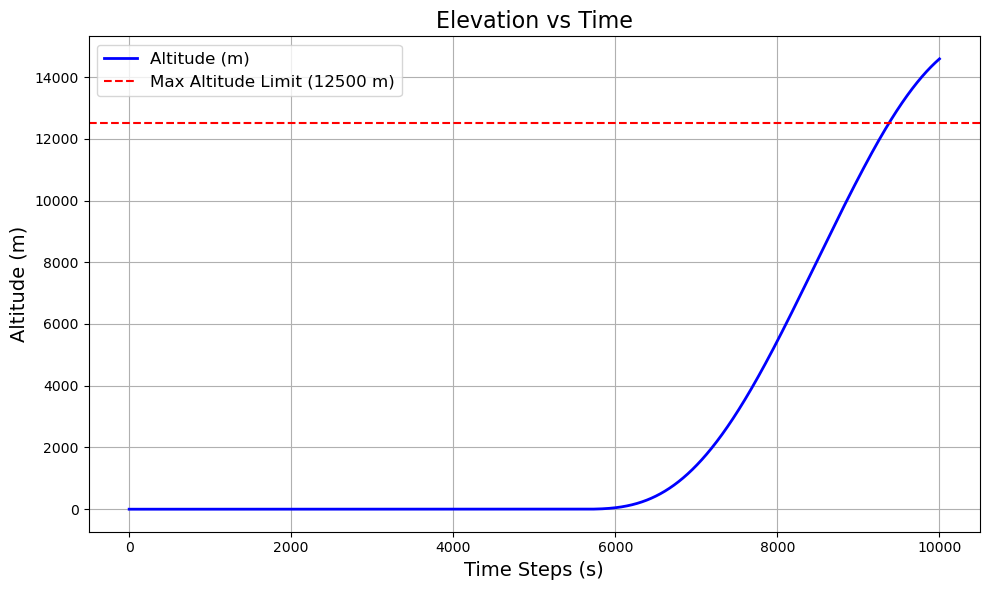

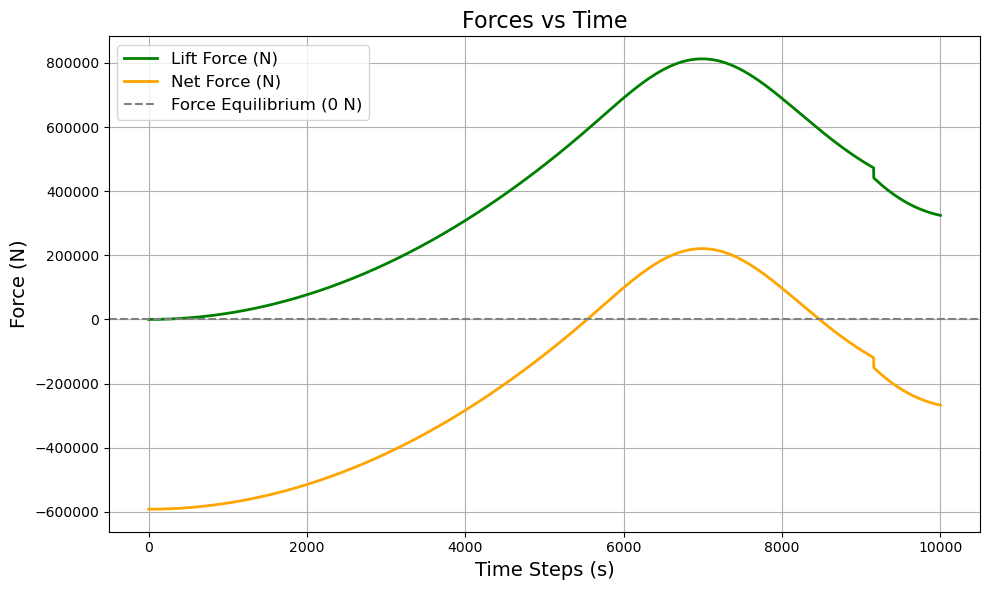

In [34]:
time_steps1 = np.arange(len(pos))  # Create a time axis based on iterations

plt.figure(figsize=(10, 6))
plt.plot(time_steps1, pos, label="Altitude (m)", color="blue", linewidth=2)
plt.axhline(y=12500, color="red", linestyle="--", label="Max Altitude Limit (12500 m)")
plt.title("Elevation vs Time", fontsize=16)
plt.xlabel("Time Steps (s)", fontsize=14)
plt.ylabel("Altitude (m)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot forces (Lift and Net Force)
forces = [forcelift(c_l_cruise, elev_dens(p), speeds[i]) for i, p in enumerate(pos[:len(speeds)])]
net_forces = [f - (mass * g) for f in forces]
time_steps2 = np.arange(len(forces))  # Adjust to match the length of forces

plt.figure(figsize=(10, 6))
plt.plot(time_steps2, forces, label="Lift Force (N)", color="green", linewidth=2)
plt.plot(time_steps2, net_forces, label="Net Force (N)", color="orange", linewidth=2)
plt.axhline(y=0, color="gray", linestyle="--", label="Force Equilibrium (0 N)")
plt.title("Forces vs Time", fontsize=16)
plt.xlabel("Time Steps (s)", fontsize=14)
plt.ylabel("Force (N)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

In [6]:
#Step 4
#Create some computation or model to compare our model to CFD Simulation
#Compute error (difference) between models
#Maryam

In [11]:
#Maryam
# import numpy as np
# import matplotlib.pyplot as plt
# # Given data from CFD
# L_125 = 12925  # Lift force at 125 m/s in Newtons
# v_ref = 125    # Reference velocity in m/s
# cruise_v = 285

# # Create speed array
# speeds = np.linspace(0, cruise_v, 10000)

# # Interpolated lift force using the scaling law: L(v) = L_125 * (v / v_ref)^2
# lift_forces = L_125 * (speeds / v_ref) ** 2

# # Optional: Plot the result
# plt.plot(speeds, lift_forces, label='Lift at 5° AoA')
# plt.xlabel('Velocity (m/s)')
# plt.ylabel('Lift Force (N)')
# plt.title('Interpolated Lift Force vs Velocity')
# plt.grid(True)
# plt.legend()
# plt.savefig('lift_vs_velocity.eps', format='eps', dpi=600)
# plt.savefig('lift_vs_velocity.pdf') 
# plt.show()

In [8]:
#Maryam
import numpy as np
import matplotlib.pyplot as plt

# Aircraft and environment parameters
w_area = 124.6
mass = 60327.79  # kg
g = 9.81         # m/s^2

data_rows = []

# CFD Lookup Table for (Mach, Altitude_km) => C_L
cl_lookup = {
    (0.5, 10): 0.4326,
    (0.5, 20): 0.4975,
    (0.5, 30): 0.5618,
    (0.9, 10): 0.2344,
    (0.9, 20): 0.1972,
    (0.9, 30): 0.1917,
    (2.0, 10): 0.1831,
    (2.0, 20): 0.1832,
    (2.0, 30): 0.1833,
}

# ISA-based temperature model
def isa_temperature(h):
    return 288.15 - 0.0065 * h if h < 11000 else 216.65

# Get C_L based on current velocity and altitude
def get_cl_from_lookup(velocity, altitude_m):
    gamma = 1.4
    R = 287.05
    T = isa_temperature(altitude_m)
    a = np.sqrt(gamma * R * T)
    mach = velocity / a if a > 0 else 0

    # Find the closest (Mach, Alt_km) pair
    closest_key = min(
        cl_lookup.keys(),
        key=lambda k: abs(k[0] - mach) + abs(k[1]*1000 - altitude_m)
    )
    return cl_lookup[closest_key]

# Density vs Altitude (same as your function)
def elev_dens(h):
    if -2000 <= h < 11500:
        return np.exp(0.007400 - 0.000107 * h) * 1.2250
    elif 11500 <= h <= 20000:
        return np.exp(0.514800 - 0.000157 * h) * 1.2250
    elif 20000 < h < 30000:
        return np.exp(0.501300 - 0.000157 * h) * 1.2250
    else:
        return 0  # Outside model range

# Kinematics functions
def forcelift(c_l, rho, v):
    return c_l * (0.5 * rho * v**2) * w_area

def vert_acc(force, v):
    return force / mass if force >= 0 or v >= 157.8518 else 0

def delta_x(acc, vel, t):
    return vel * t + 0.5 * acc * t**2 if acc != 0 else vel * t

# Simulate
cruise_v = 285
speeds = np.linspace(0, cruise_v, 10000)
t_step = cruise_v / len(speeds)

pos = [0]
vels = [0]

#print(f"{'m/s':^8s}, {'c_l':^6s}, {'N':^12s}, {'m/s^2':^7s}, {'m':^10s}, {'kg/m^3':^10s}")

for i in range(len(speeds)):
    v = speeds[i]
    h = pos[-1]
    rho = elev_dens(h)
    c_l = get_cl_from_lookup(v, h)
    
    lift = forcelift(c_l, rho, v)
    net_force = lift - (mass * g)
    acc = vert_acc(net_force, v)
    
    delta_pos = delta_x(acc, vels[-1], t_step)
    pos.append(h + delta_pos)
    vels.append(vels[-1] + acc * t_step)
    
    data_rows.append([
        i,          # Time step
        lift,       # Lift force
        pos[-1],    # Altitude
        net_force   # Net lift force
    ])
    
    #print(f"{v:8.4f}, {c_l:6.4f}, {net_force:12.4f}, {acc:7.4f}, {pos[-1]:10.4f}, {rho:.8f}")

    df = pd.DataFrame(data_rows, columns=[
        "Time Step", "Lift Force (N)", "Altitude (m)", "Net Lift Force (N)"
    ])

df.to_csv("CFD1.csv", index=False)

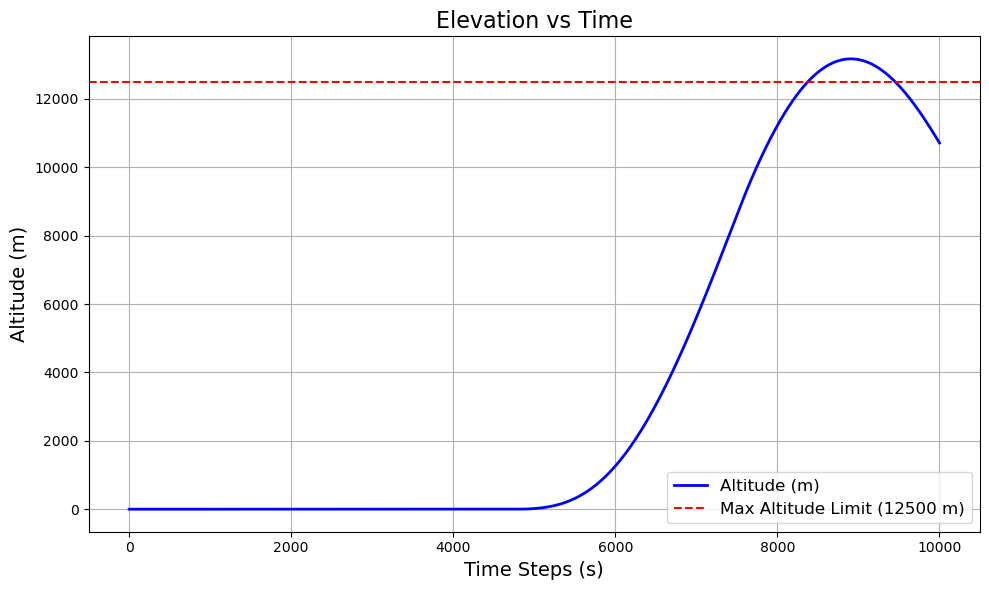

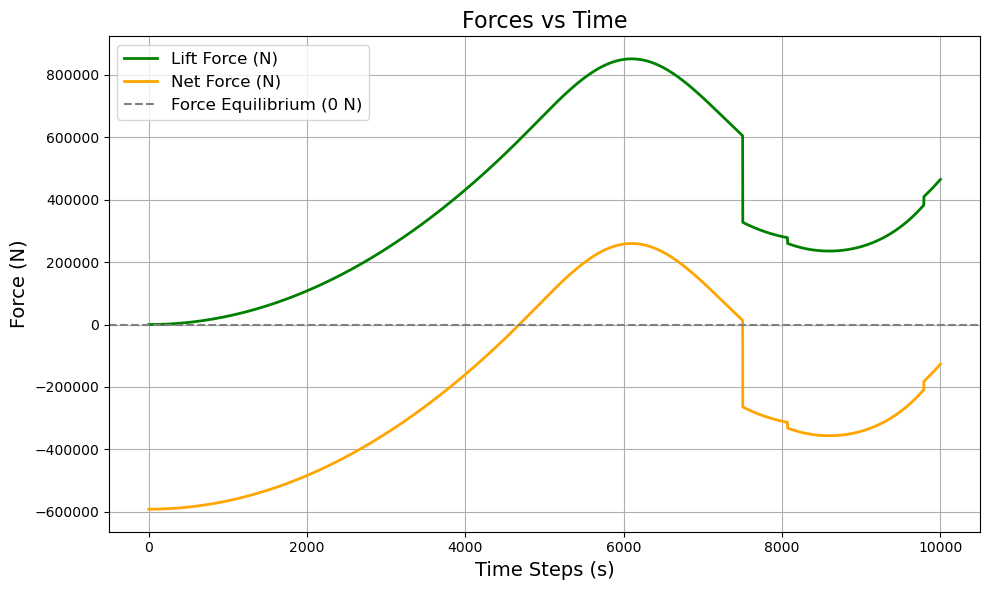

In [10]:
time_steps1 = np.arange(len(pos))  # Create a time axis based on iterations

plt.figure(figsize=(10, 6))
plt.plot(time_steps1, pos, label="Altitude (m)", color="blue", linewidth=2)
plt.axhline(y=12500, color="red", linestyle="--", label="Max Altitude Limit (12500 m)")
plt.title("Elevation vs Time", fontsize=16)
plt.xlabel("Time Steps (s)", fontsize=14)
plt.ylabel("Altitude (m)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot forces (Lift and Net Force)
forces = [forcelift(get_cl_from_lookup(speeds[i], p), elev_dens(p), speeds[i]) for i, p in enumerate(pos[:len(speeds)])]
net_forces = [f - (mass * g) for f in forces]
time_steps2 = np.arange(len(forces))  # Adjust to match the length of forces

plt.figure(figsize=(10, 6))
plt.plot(time_steps2, forces, label="Lift Force (N)", color="green", linewidth=2)
plt.plot(time_steps2, net_forces, label="Net Force (N)", color="orange", linewidth=2)
plt.axhline(y=0, color="gray", linestyle="--", label="Force Equilibrium (0 N)")
plt.title("Forces vs Time", fontsize=16)
plt.xlabel("Time Steps (s)", fontsize=14)
plt.ylabel("Force (N)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()

In [9]:
#Maryam
import numpy as np
from numpy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt

#Gross Dimensions
w_area = 124.6
#Approx Dimensions (Wingspan*Mean Aerodynamic Chord)
approx_w_area = 135.8866
#max takeoff weight 60327.79 kg
mass = 60327.79
g=9.81
#angle of attack fixed = 0
data_rows = []
#During takeoff, pilots adjust the aircraft's flaps and slats to increase the effective ( C_L ).
#The coefficient of lift for a Boeing 737-700 at takeoff can be significantly higher than the value (0.309),
#depending on flap settings. Typical ( C_L ) values at takeoff range between 1.5 and 2.0
c_l_max=2.06
#Approximate Take off speed 71.96 m/s - 92.52 m/s
#Safe conventional takeoff max c_l = 70% of max = 1.442
c_l_takeoff=c_l_max*.70
#Cruising Altitude 12500 m
#Cruising Speed 828 km/h = 230 m/s
c_l_cruise = 0.01085
#coefficient of lift begin steady decrease @ 914.4 m

#Model for elevation to density (m & kg/m^3) 
def elev_dens(h):
    if -2000 <= h < 11500:
        return np.exp(0.007400 - 0.000107 * h) * 1.2250
    elif 11500 <= h <= 20000:
        return np.exp(0.514800 - 0.000157 * h) * 1.2250
    elif 20000 < h < 30000:
        return np.exp(0.501300 - 0.000157 * h) * 1.2250
    else:
        return 0.0  # or some very low fallback density to avoid NoneType


#max speed 285 m/s
cruise_v = 285
speeds = np.linspace(0,cruise_v,10000)

pos=[0]
t_step=cruise_v/len(speeds)
vels=[0]

def forcelift(c_l,rho,v):
    value = (c_l*((rho*(v**2))/2)*w_area)
    return value
    
def vert_acc(force,v):
    if force >=0 or v>=157.8518:
        return force/mass
    else:
        return 0
        
def delta_x(acc,vel,t):
    if acc == 0:
        return vel*t
    else:
        return(vel*t)+(0.5*acc*(t**2))
        
#print(f"{"m/s":^8s}, {"c_l":^6s}, {"N":^12s}, {"m/s^2":^7s}, {"m":^10s}, {"kg/m^3":^10s}")

for i in range(len(speeds)):
    rho = elev_dens(pos[-1])  # Air density based on current position (altitude)
    #c_l = cl_dec(pos[-1])  # Dynamic coefficient of lift based on altitude
    c_l = c_l_cruise
    # Calculate lift force
    lift = forcelift(c_l, rho, speeds[i])
#     net_force = lift - (mass * g) 
    net_force = lift# Net force
    
    acc = vert_acc(net_force, speeds[i])  # Vertical acceleration
    
    # Calculate change in position and update altitude
    delta_pos = delta_x(acc, vels[-1], t_step)
    pos.append(pos[-1] + delta_pos)  # Update altitude
    vels.append(vels[-1] + (acc * t_step))  # Update velocity
    
    data_rows.append([
        i,          # Time step
        lift,       # Lift force
        pos[-1],    # Altitude
        net_force   # Net lift force
    ])
            
    #print(f"{speeds[i]:8.4f}, {c_l:6.4f}, {net_force:12.4f}, {acc:7.4f}, {pos[-1]:10.4f}, {rho:.8f}")
    
    df = pd.DataFrame(data_rows, columns=[
        "Time Step", "Lift Force (N)", "Altitude (m)", "Net Lift Force (N)"
    ])

df.to_csv("CFD2.csv", index=False)

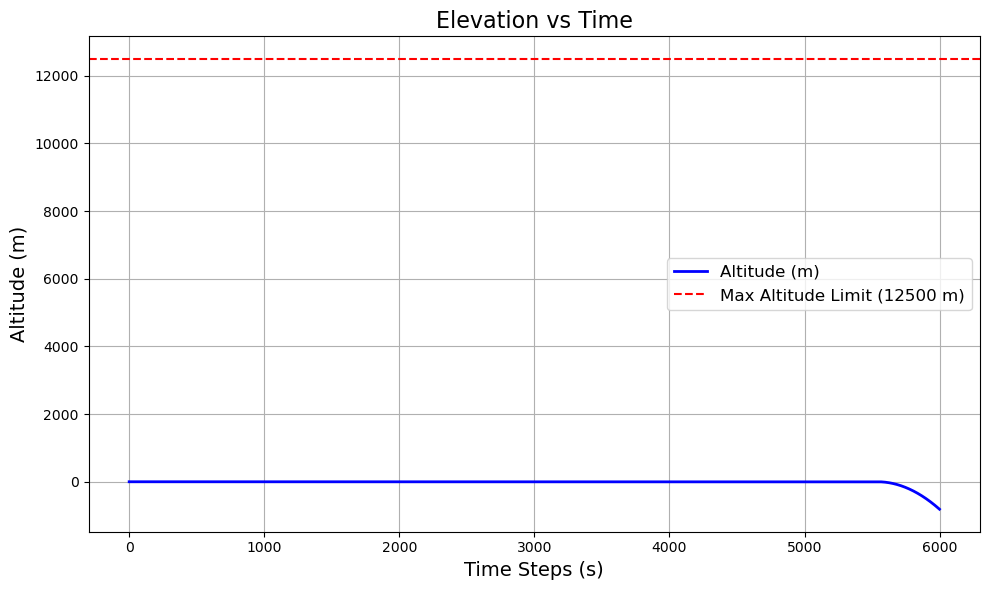

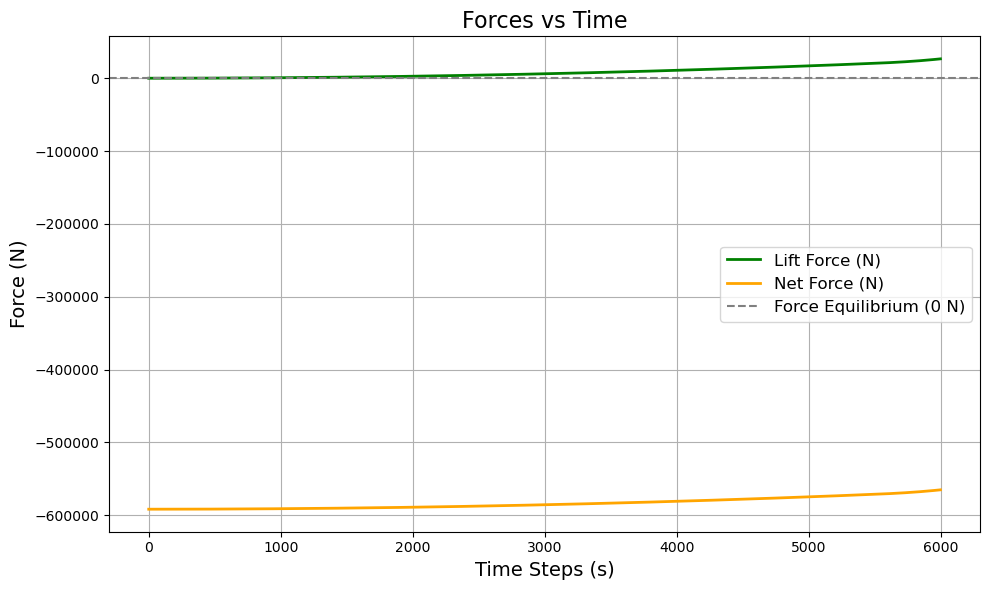

In [3]:
max_steps = 6000
time_steps1 = np.arange(min(len(pos), max_steps))

# Altitude vs Time
plt.figure(figsize=(10, 6))
plt.plot(time_steps1, pos[:max_steps], label="Altitude (m)", color="blue", linewidth=2)
plt.axhline(y=12500, color="red", linestyle="--", label="Max Altitude Limit (12500 m)")
plt.title("Elevation vs Time", fontsize=16)
plt.xlabel("Time Steps (s)", fontsize=14)
plt.ylabel("Altitude (m)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Forces vs Time
forces = [forcelift(c_l_cruise, elev_dens(p), speeds[i]) for i, p in enumerate(pos[:len(speeds)])]
net_forces = [f - (mass * g) for f in forces]
time_steps2 = np.arange(min(len(forces), max_steps))

plt.figure(figsize=(10, 6))
plt.plot(time_steps2, forces[:max_steps], label="Lift Force (N)", color="green", linewidth=2)
plt.plot(time_steps2, net_forces[:max_steps], label="Net Force (N)", color="orange", linewidth=2)
plt.axhline(y=0, color="gray", linestyle="--", label="Force Equilibrium (0 N)")
plt.title("Forces vs Time", fontsize=16)
plt.xlabel("Time Steps (s)", fontsize=14)
plt.ylabel("Force (N)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


CFD1 head:
   Time Step  Lift Force (N)  Altitude (m)  Net Lift Force (N)
0          0        0.000000           0.0      -591815.619900
1          1        0.027021           0.0      -591815.592879
2          2        0.108084           0.0      -591815.511816
3          3        0.243189           0.0      -591815.376711
4          4        0.432336           0.0      -591815.187564

CFD2 head:
   Time Step  Lift Force (N)  Altitude (m)  Net Lift Force (N)
0          0        0.000000  0.000000e+00            0.000000
1          1        0.000678  4.562328e-12            0.000678
2          2        0.002711  3.193630e-11            0.002711
3          3        0.006099  1.186205e-10            0.006099
4          4        0.010843  3.193630e-10            0.010843

Wind Tunnel head:
   Time Step  Lift Force (N)  Altitude (m)  Net Lift Force (N)
0          0        0.000000           0.0      -591815.619900
1          1        0.019301           0.0      -591815.600599
2          2

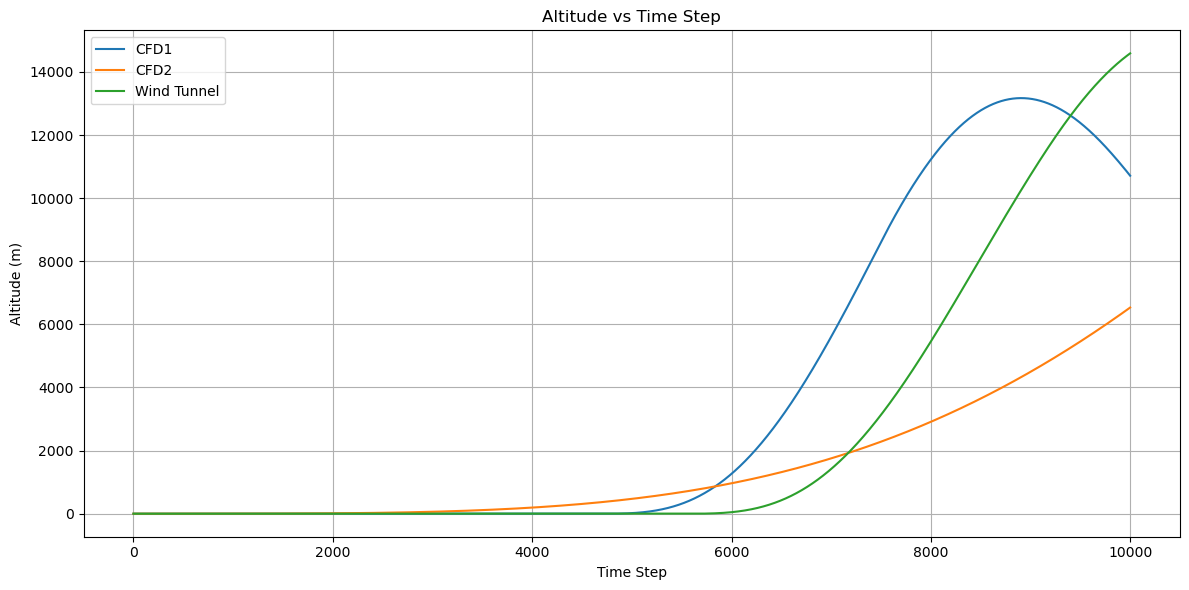

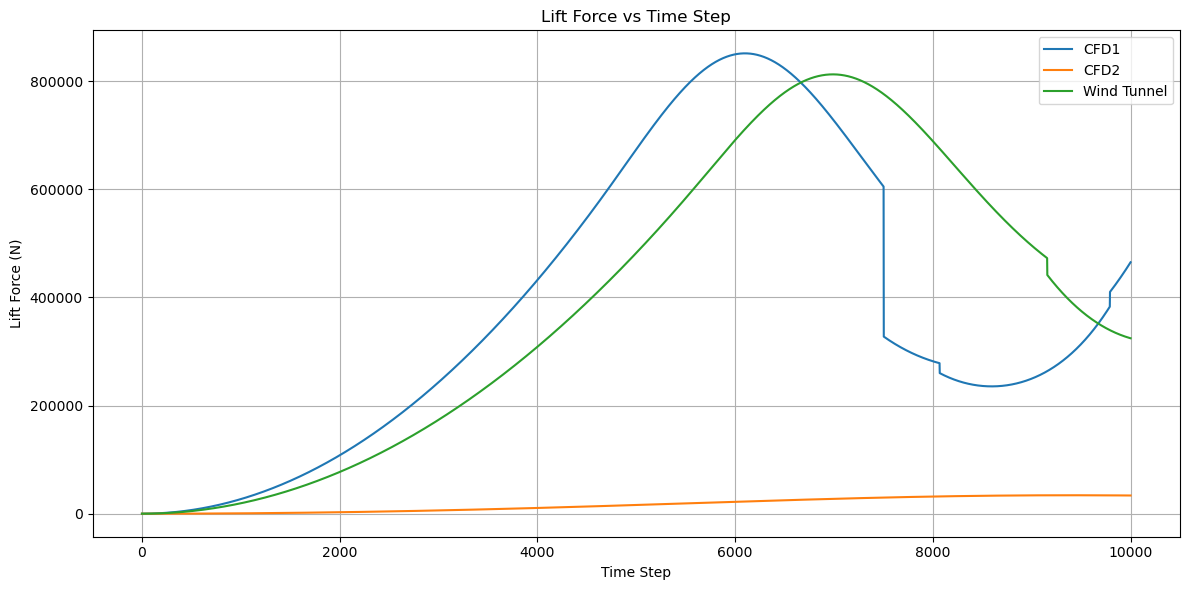

CFD1 vs Wind Tunnel - Max Error: 448496.111, Mean Error: 132190.858
CFD2 vs Wind Tunnel - Max Error: 785298.073, Mean Error: 373482.459


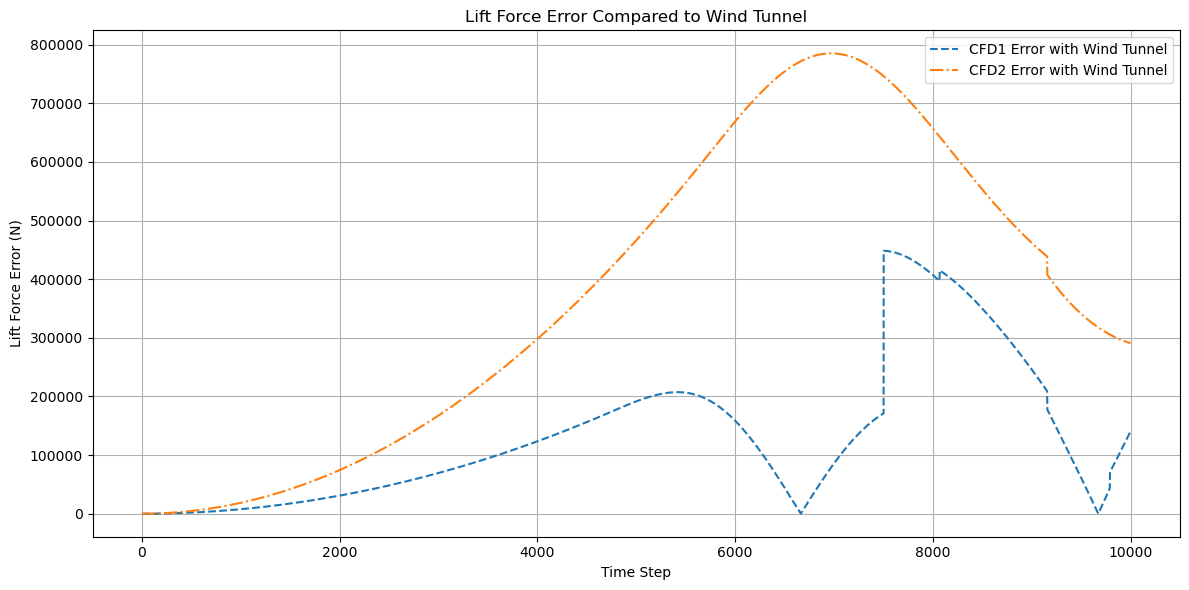

CFD1 vs Wind Tunnel (Altitude) - Max Error: 5831.974, Mean Error: 1452.497
CFD2 vs Wind Tunnel (Altitude) - Max Error: 8055.097, Mean Error: 1481.392


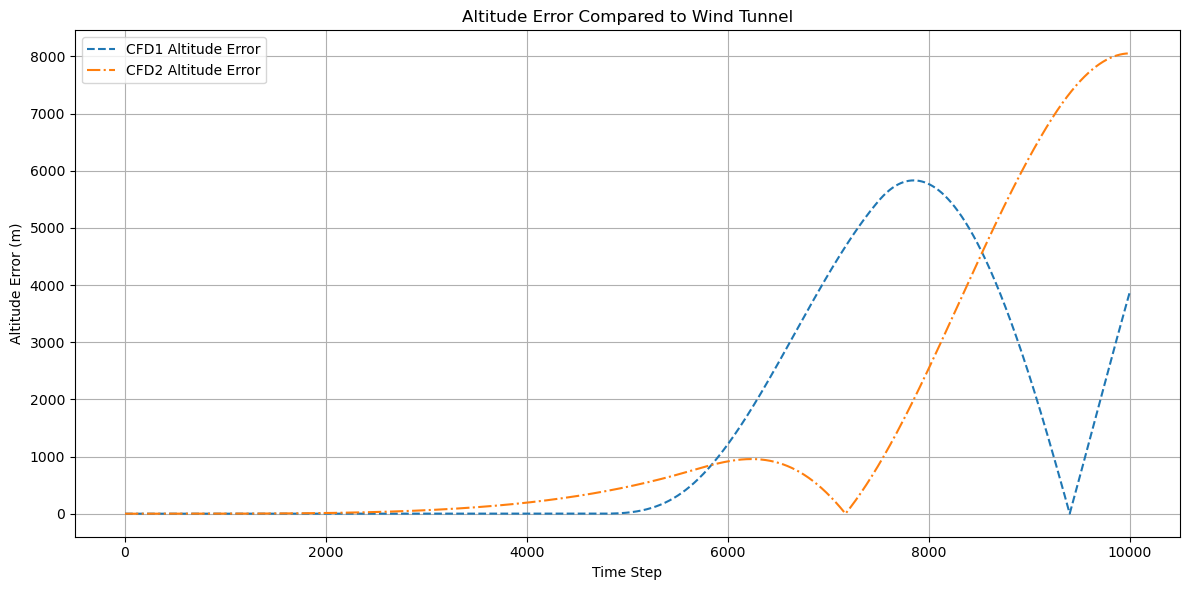

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the files
cfd1 = pd.read_csv("CFD1.csv")
cfd2 = pd.read_csv("CFD2.csv")
wind_tunnel = pd.read_csv("wind_tunnel.csv")

# Optional: Print first few rows to verify
print("\nCFD1 head:")
print(cfd1.head())
print("\nCFD2 head:")
print(cfd2.head())
print("\nWind Tunnel head:")
print(wind_tunnel.head())

# Step 2: Plot Altitude vs Time Step
plt.figure(figsize=(12, 6))
plt.plot(cfd1['Time Step'], cfd1['Altitude (m)'], label='CFD1')
plt.plot(cfd2['Time Step'], cfd2['Altitude (m)'], label='CFD2')
plt.plot(wind_tunnel['Time Step'], wind_tunnel['Altitude (m)'], label='Wind Tunnel')
plt.xlabel('Time Step')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs Time Step')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("altitude_vs_time_step.pdf")
plt.savefig("altitude_vs_time_step.png")
plt.show()

# Step 3: Plot Lift Force vs Time Step
plt.figure(figsize=(12, 6))
plt.plot(cfd1['Time Step'], cfd1['Lift Force (N)'], label='CFD1')
plt.plot(cfd2['Time Step'], cfd2['Lift Force (N)'], label='CFD2')
plt.plot(wind_tunnel['Time Step'], wind_tunnel['Lift Force (N)'], label='Wind Tunnel')
plt.xlabel('Time Step')
plt.ylabel('Lift Force (N)')
plt.title('Lift Force vs Time Step')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("lift_force_vs_time_step.pdf")
plt.savefig("lift_force_vs_time_step.png")
plt.show()

error_cfd1 = abs(cfd1['Lift Force (N)'] - wind_tunnel['Lift Force (N)'])
error_cfd2 = abs(cfd2['Lift Force (N)'] - wind_tunnel['Lift Force (N)'])

# Optional: print max and mean error for inspection
print(f"CFD1 vs Wind Tunnel - Max Error: {error_cfd1.max():.3f}, Mean Error: {error_cfd1.mean():.3f}")
print(f"CFD2 vs Wind Tunnel - Max Error: {error_cfd2.max():.3f}, Mean Error: {error_cfd2.mean():.3f}")

# Step 2: Plot the errors
plt.figure(figsize=(12, 6))
plt.plot(wind_tunnel['Time Step'], error_cfd1, label='CFD1 Error with Wind Tunnel', linestyle='--')
plt.plot(wind_tunnel['Time Step'], error_cfd2, label='CFD2 Error with Wind Tunnel', linestyle='-.')
plt.xlabel('Time Step')
plt.ylabel('Lift Force Error (N)')
plt.title('Lift Force Error Compared to Wind Tunnel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("lift_force_error.pdf")
plt.savefig("lift_force_error.png")
plt.show()

# Step 1: Compute absolute error in Altitude
altitude_error_cfd1 = abs(cfd1['Altitude (m)'] - wind_tunnel['Altitude (m)'])
altitude_error_cfd2 = abs(cfd2['Altitude (m)'] - wind_tunnel['Altitude (m)'])

# Optional: Print summary statistics
print(f"CFD1 vs Wind Tunnel (Altitude) - Max Error: {altitude_error_cfd1.max():.3f}, Mean Error: {altitude_error_cfd1.mean():.3f}")
print(f"CFD2 vs Wind Tunnel (Altitude) - Max Error: {altitude_error_cfd2.max():.3f}, Mean Error: {altitude_error_cfd2.mean():.3f}")

# Step 2: Plot the errors
plt.figure(figsize=(12, 6))
plt.plot(wind_tunnel['Time Step'], altitude_error_cfd1, label='CFD1 Altitude Error', linestyle='--')
plt.plot(wind_tunnel['Time Step'], altitude_error_cfd2, label='CFD2 Altitude Error', linestyle='-.')
plt.xlabel('Time Step')
plt.ylabel('Altitude Error (m)')
plt.title('Altitude Error Compared to Wind Tunnel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("altitude_error.pdf")
plt.savefig("altitude_error.png")
plt.show()